# Exercises Discriminant Analysis

In [28]:
import pandas as pd                                                     # Data manipulation
import numpy as np                                                      # Scientific computing
import matplotlib.pyplot as plt                                         # Data visualization
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis    # Discriminant Analysis

from Resources.Functions import *                                       # Custom functions

## Theoretical questions

### Question 1:
- Can you predict the writing hand of the next student based on the specified height (`182`), pieces of fruit (`2`), shoe size (`44`), distance to KdG (`22`)? Only use students who have specified Left or Right as their writing hand.
- Draw up a confusion matrix based on the predicted and effective values for the data you used to perform the discriminant analysis (see 1).
- Calculate the usual evaluation metrics for a binary classifier.
- Draw the ROC curve. If applicable, explain why the ROC curve is not drawn.
- What is the accuracy of the discriminant analysis where height and shoe size predict the number of brothers and sisters?

**Name of Columns**: `gapminder` `schrijfhand` `schoenmaat` `lengte` `bloedgroep` `resus` `siblings` `Samenzweringen` `rijbewijs` `domicilie in Antwerpen` `afstudeerrichting` `vrijetijdsbesteding` `uren wiskunde` `informatica` `belangrijk` `uren buiten schooluren` `afstand tot KdG` `vervoersmiddel` `klimaatopwarming` `zakgeld` `stukken fruit` `fruitvoorkeur` `besturingssysteem` `belangrijkste app` `M1 - stelen` `M2 - team` `M3 - beschermen` `M4 - voorbeeld` `M5 - embryo` `M6 - vrijheid` `mascotte` `zwaarste vak` `boeienste vak` `studiepunt`

In [2]:
data1 = pd.read_csv('../Data/Data1.csv', delimiter=';', decimal=',')
display(data1.head())

,gapminder,schrijfhand,schoenmaat,lengte,bloedgroep,resus,siblings,Samenzweringen,rijbewijs,domicilie in Antwerpen,...,M1 - stelen,M2 - team,M3 - beschermen,M4 - voorbeeld,M5 - embryo,M6 - vrijheid,mascotte,zwaarste vak,boeienste vak,studiepunt
0,7/18,Rechts,43.0,184,O,positief,5,De tsunami van 2004 in de Indische Oceaan was ...,Categorie B: Wagens.,"buiten de stad (een dorp, een gehucht, het pla...",...,7,2,8,6,5,4.0,"1=Bever,2=Wasbeer,3=Otter,4=Wolf,5=Poema,6=Pan...",Management 1,Data science 1,16-20 uren
1,3/18,Rechts,42.0,163,Weet ik niet,Weet ik niet,1,Prinses Diana kwam niet per ongeluk om het leven,Categorie AM: Bromfietsen met een maximumsnelh...,in een stad,...,10,5,10,6,7,3.0,"1=Bever,2=Wolf,3=Bizon,4=Otter,5=Panter,6=Poem...",Management 1,Computersystemen 1,<= 10 uren
2,12/18,Rechts,45.0,183,AB,positief,2,Prinses Diana kwam niet per ongeluk om het lev...,Categorie AM: Bromfietsen met een maximumsnelh...,in een stad,...,6,3,7,7,10,6.0,"1=Bruine beer,2=Poema,3=Panter,4=Wolf,5=Vos,6=...",Management 1,Programmeren 1 - Java,16-20 uren
3,5/18,Rechts,44.0,175,A,positief,2,De wereld wordt eigenlijk gecontroleerd door e...,Categorie AM: Bromfietsen met een maximumsnelh...,in een stad,...,9,10,10,10,10,0.0,"1=Wasbeer,2=Wolf,3=Bruine beer,4=Das,5=Vos,6=B...",Management 1,Data science 1,<= 10 uren
4,6/18,Rechts,43.0,173,B,positief,3,De wereld wordt eigenlijk gecontroleerd door e...,Categorie B: Wagens.,in een stad,...,10,6,10,7,7,2.0,"1=Wolf,2=Vos,3=Bruine beer,4=Bizon,5=Panter,6=...",Management 1,Data science 1,<= 10 uren


In [3]:
# 1
X = data1[['lengte', 'stukken fruit', 'schoenmaat', 'afstand tot KdG']]
y = data1['schrijfhand']
lda = LinearDiscriminantAnalysis()
lda.fit(X, y)

testdata = pd.DataFrame(data={'lengte': [182], 'stukken fruit': [2], 'schoenmaat': [44], 'afstand tot KdG': [22]})
print(lda.predict(testdata))
print(lda.predict_proba(testdata))

['Rechts']
[[0.09459903 0.90540097]]


In [4]:
# 2
predicted = pd.Series(lda.predict(X), name='predicted')
actual = y.rename('actual')
confusion_matrix = pd.crosstab(index=actual, columns=predicted, margins='all', margins_name='total')
print(confusion_matrix)

predicted  Links  Rechts  total
actual                         
Links          1      13     14
Rechts         1      74     75
total          2      87     89


In [5]:
# 3
accuracy = np.mean(predicted == actual)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.84


In [6]:
# 4
print("ROC curve is not drawn because the discriminant analysis is not a binary classifier.")

ROC curve is not drawn because the discriminant analysis is not a binary classifier.


In [7]:
# 5
X = data1[['lengte', 'schoenmaat']]
y = data1['siblings']
lda = LinearDiscriminantAnalysis()
lda.fit(X, y)
predicted = pd.Series(lda.predict(X), name='predicted')
actual = y.rename('actual')
accuracy = np.mean(predicted == actual)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.35


### Question 2:
- In the Canvas course, find the dataset `Bordeaux.csv` and place it in a data frame.
    - Apply a discriminant analysis to this data set with quality as the dependent variable and `temperature`, `sun`, `heat` and `rain` as the independent variables.
    - How many dimensions does the discriminant analysis have?
    - Plot the results of the discriminant analysis. What is visualized here?
    - Apply the predict command briefly to the original data. What percentage of the wines receive the same label via the discriminant analysis as observed?

In [8]:
bordeaux = pd.read_csv('../Data/Bordeaux.csv', delimiter=';', decimal=',')
display(bordeaux.head())

,year,temperature,sun,heat,rain,quality
0,1924,3064,1201,10,361,medium
1,1925,3000,1053,11,338,bad
2,1926,3155,1133,19,393,medium
3,1927,3085,970,4,467,bad
4,1928,3245,1258,36,294,good


In [9]:
# 1
X = bordeaux[['temperature', 'sun', 'heat', 'rain']]
y = bordeaux['quality']
lda = LinearDiscriminantAnalysis()
print(lda.fit(X, y))

LinearDiscriminantAnalysis()


In [10]:
# 2
print((len(y.unique())-1)) # Dimension = Total classes - 1

2


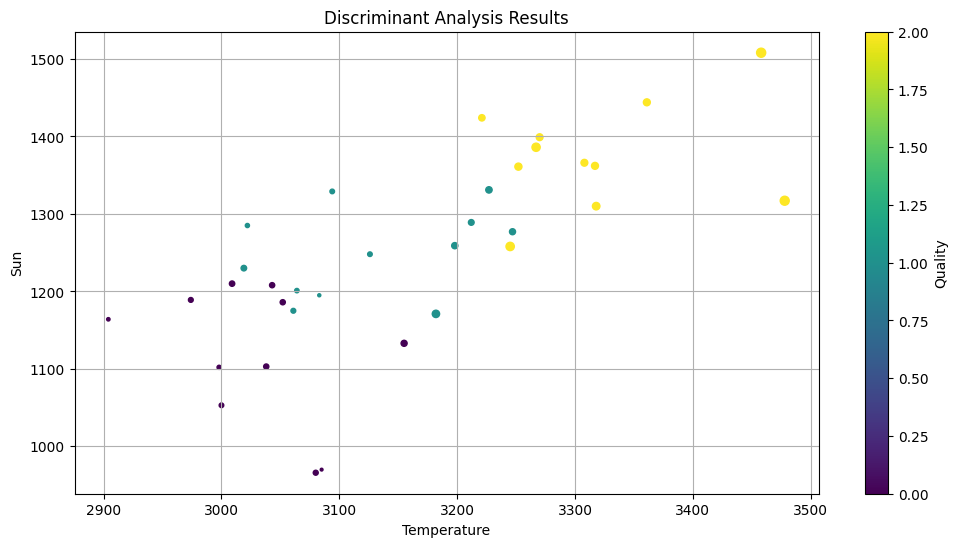

The plot visualizes the results of the discriminant analysis. So we can easily see the different quality levels of the wines.


In [11]:
# 3
quality_mapping = {'bad': 0, 'medium': 1, 'good': 2}
bordeaux['quality_code'] = bordeaux['quality'].map(quality_mapping)
y2 = bordeaux['quality_code']

lda = LinearDiscriminantAnalysis()
lda.fit(X, y2)

plt.figure(figsize=(12, 6))

plt.scatter(X['temperature'], X['sun'], X['heat'], c=lda.predict(X), cmap='viridis')
plt.colorbar(label='Quality')
plt.xlabel('Temperature')
plt.ylabel('Sun')
plt.title('Discriminant Analysis Results')

plt.grid(True)
plt.show()

print("The plot visualizes the results of the discriminant analysis. So we can easily see the different quality levels of the wines.")

In [12]:
# 4
predicted = lda.predict(X)
accuracy = np.mean(predicted == y2)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.79


### Question 3:
- In the Canvas course, find the dataset `Birthwt.csv` and place it in a data frame.
    - Analyze the type of data in this dataset.
    - Which columns can be used as dependent variables for a discriminant analysis?
    - Which columns can be used as independent variables for a discriminant analysis?
    - Apply a discriminant analysis to this data set (using your choices above).
    - How many dimensions does the discriminant analysis have?
    - Plot the results of the discriminant analysis.

**Name of Columns & Meaning**:
    - `low`: Indicator of birth weight less than 2.5 kg
    - `age`: Mother's age in years
    - `lwt`: Mother's weight in pounds at last menstrual period
    - `race`: Mother's race (1 = white, 2 = black, 3 = other)
    - `smoke`: Smoking status during pregnancy (1 = yes, 0 = no)
    - `ptl`: Number of previous premature labors
    - `ht`: History of hypertension (1 = yes, 0 = no)
    - `ui`: Presence of uterine irritability (1 = yes, 0 = no)
    - `ftv`: Number of physician visits during the first trimester
    - `bwt`: Birth weight in grams

In [13]:
birthwt = pd.read_csv('../Data/Birthwt.csv', delimiter=';', decimal=',')
display(birthwt.head())

,low,age,lwt,race,smoke,ptl,ht,ui,ftv,bwt
0,0,19,182,2,0,0,0,1,0,2523
1,0,33,155,3,0,0,0,0,3,2551
2,0,20,105,1,1,0,0,0,1,2557
3,0,21,108,1,1,0,0,1,2,2594
4,0,18,107,1,1,0,0,1,0,2600


In [14]:
# 1
print(birthwt.dtypes)

low      int64
age      int64
lwt      int64
race     int64
smoke    int64
ptl      int64
ht       int64
ui       int64
ftv      int64
bwt      int64
dtype: object


In [15]:
# 2
print("In principle, we can use the mall in this case. But for simplicity we will use 'smoke'.")

In principle, we can use the mall in this case. But for simplicity we will use 'smoke'.


In [16]:
# 3
print("We can use 'age', 'lwt' & 'bwt' as independent variables.")

We can use 'age', 'lwt' & 'bwt' as independent variables.


In [17]:
# 4
X = birthwt[['age', 'lwt', 'bwt']]
y = birthwt['smoke']
lda = LinearDiscriminantAnalysis()
print(lda.fit(X, y))

LinearDiscriminantAnalysis()


In [18]:
# 5
print((len(y.unique())-1)) # Dimension = Total classes - 1

1


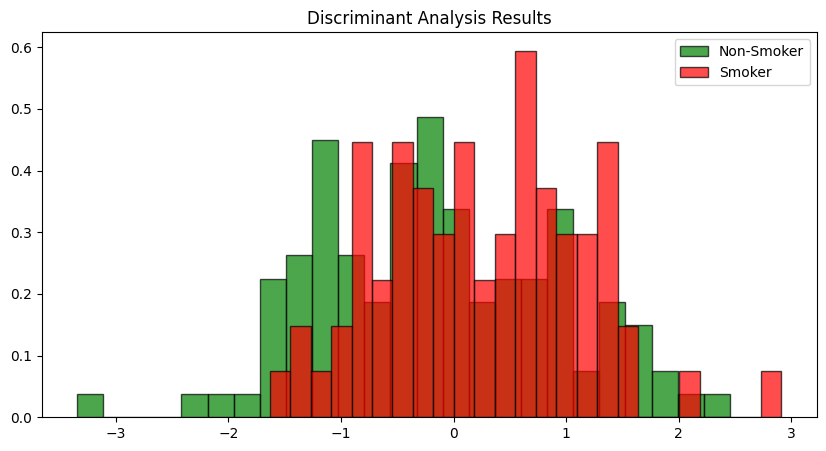

In [19]:
# 6 
birthwt["LD1"] = lda.transform(X)[:, 0]
plt.figure(figsize=(10, 5))
birthwt['LD1'][birthwt['smoke'] == 0].hist(bins=25, density=True, edgecolor='black', color='green', alpha=0.7, label='Non-Smoker')
birthwt['LD1'][birthwt['smoke'] == 1].hist(bins=25, density=True, edgecolor='black', color='red', alpha=0.7, label='Smoker')
plt.title('Discriminant Analysis Results')
plt.legend()
plt.grid(False)
plt.show()

### Question 4:
- Find the dataset 'Cars93' on Canvas and place it in a data frame.
    - Analyze the type of data in this dataset.
    - Split the data set into two: the first `90` rows as a `learning data set` for why you are going to apply a discriminant analysis (see 5) and the last 3 rows to check whether the obtained discriminant analysis places these cars in the correct class places (see 7).
    - Which columns can be used as dependent variables for a discriminant analysis?
    - Which columns can be used as independent variables for a discriminant analysis?
    - Apply a discriminant analysis to this data set. Take the Type column as the dependent variable and all usable columns as the independent variables (see 4).
    - How many dimensions does the discriminant analysis have?
    - Apply the obtained discriminant analysis using the predict command to the last 3 rows of the original data (see 2). Will all 3 cars be placed in the correct class?

**Name of Columns & Meaning**:
    - `Manufacturer`: Manufacturer of the car
    - `Model`: Model of the car
    - `Type`: A factor with levels `Small`, `Sporty`, `Compact`, `Midsize`, `Large` and `Van`
    - `Min.Price`: Minimum Price (in \$1,000) price of a basic version of the car
    - `Price`: Midrange Price (in \$1,000) average of `Min.Price` and `Max.Price`
    - `Max.Price`: Maximum Price (in \$1,000) price of `a premium version` of the car
    - `MPG.city`: City MPG (miles per US gallon by EPA rating)
    - `MPG.highway`: Highway MPG
    - `AirBags`: AirBags standard. Factor: `None`, `Driver only`, `Driver` & `Passenger`
    - `DriveTrain`: Drive train type: `Real wheel`, `Front wheel` or `4WD` (factor)
    - `Cylinders`: Number of cylinders (missing for Mazda RX-7, which has a rotary engine)
    - `EngineSize`: Engine size (liters)
    - `Horsepower`: Horsepower (maximum)
    - `RPM`: RPM (revs per minute at maximum horsepower)
    - `Rev.per.mile`: Engine revolutions per mile (in the highest gear)
    - `Man.trans.avail`: Is a manual transmission available? Factor with levels `Yes` and `No`
    - `Fuel.tank.capacity`: Fuel tank capacity (US gallons)
    - `Passengers`: Passenger capacity (persons)
    

In [20]:
cars93 = pd.read_csv('../Data/Cars93.csv', delimiter=';', decimal='.')
display(cars93.head())

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,Acura,Integra,Small,12.9,15.9,18.8,25,31,NaN,Front,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,Front,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


In [21]:
# 1
print(cars93.dtypes)

Manufacturer           object
Model                  object
Type                   object
Min.Price             float64
Price                 float64
Max.Price             float64
MPG.city                int64
MPG.highway             int64
AirBags                object
DriveTrain             object
Cylinders              object
EngineSize            float64
Horsepower              int64
RPM                     int64
Rev.per.mile            int64
Man.trans.avail        object
Fuel.tank.capacity    float64
Passengers              int64
Length                  int64
Wheelbase               int64
Width                   int64
Turn.circle             int64
Rear.seat.room        float64
Luggage.room          float64
Weight                  int64
Origin                 object
Make                   object
dtype: object


In [22]:
# 2
learning_data = cars93.iloc[:90]
test_data = cars93.iloc[90:]

In [23]:
# 3
print("We can use Type as dependent variable. So columns:")
print(cars93.select_dtypes(include=['object']).columns)

We can use Type as dependent variable. So columns:
Index(['Manufacturer', 'Model', 'Type', 'AirBags', 'DriveTrain', 'Cylinders',
       'Man.trans.avail', 'Origin', 'Make'],
      dtype='object')


In [24]:
# 4
print("We can use Numerical columns as independent variables. So columns:")
print(cars93.select_dtypes(include=['int64', 'float64']).columns)

We can use Numerical columns as independent variables. So columns:
Index(['Min.Price', 'Price', 'Max.Price', 'MPG.city', 'MPG.highway',
       'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile', 'Fuel.tank.capacity',
       'Passengers', 'Length', 'Wheelbase', 'Width', 'Turn.circle',
       'Rear.seat.room', 'Luggage.room', 'Weight'],
      dtype='object')


In [25]:
# 5
X = learning_data[['Min.Price', 'Price', 'Max.Price', 'MPG.city', 'MPG.highway', 'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile', 'Fuel.tank.capacity', 'Passengers']]
y = learning_data['Type']
lda = LinearDiscriminantAnalysis()
print(lda.fit(X, y))

LinearDiscriminantAnalysis()


In [26]:
# 6
print((len(y.unique())-1)) # Dimension = Total classes - 1

5


In [27]:
# 7 Apply the obtained discriminant analysis using the predict command to the last 3 rows of the original data (see 2). Will all 3 cars be placed in the correct class?
predicted = lda.predict(test_data[['Min.Price', 'Price', 'Max.Price', 'MPG.city', 'MPG.highway', 'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile', 'Fuel.tank.capacity', 'Passengers']])
print(predicted)

display(test_data['Type'])

print("Not all 3 cars will be placed in the correct class.")

print(f"Accuracy: {lda.score(X,y)}")

['Midsize' 'Midsize' 'Midsize']


90     Sporty
91    Compact
92    Midsize
Name: Type, dtype: object

Not all 3 cars will be placed in the correct class.
Accuracy: 0.8222222222222222
